# Assignment 1 - Linear Model, Back Propagation and Building a CNN

## 1. True/False Questions

For each question, please provide a short explanation to support your judgment.

### Problem 1.1 
Using a proper setting (e.g., learning rate, initialization etc.), the gradient descent algorithm is always able to yield an optimal solution on convex functions, as the local optimal value is always the global optimal value.


>True, for a convex function, the local minimum which gradient descent will lead you towards is always the global minimum making it the global optimal value for a convex function. 

### Problem 1.2 

For a given task, having more layers in a neural network model always improves its capacity. Thus, it is beneficial to have as many layers as possible to improve NN’s generalization ability.

>False, this usually depends on how large the dataset is and the complexity of the problem being solved. Additional layers do not always improve a model and can lead to overfitting. If the model is overfitting on the dataset, this makes the model less generalizable.
   

### Problem 1.3 
Given a learning task that can be perfectly learned by a Madaline model, the same set of weight values will be achieved after training, no matter how the Madaline is initialized.

>False, since Madeline uses the error-correction rule, Madeline is sensitive to initialization and as a result there is no theoretical guarantee of convergence. With random initialization, it is unknown how far the model is to the optimal objective, which means that deciding when to stop training is uncertain. This can lead to different weights if the model is stopped earlier or later in relation to the optimal objective than in previous run. 

### Problem 1.4 
Sigmoid neurons are likely to ‘die’ during the training process, as the gradients in the middle of the ‘S-shape’ sigmoidal curve may vanish. Thus, these neurons are less likely to be updated. We should use a larger learning rate to train all of the sigmoid neurons.


>False. The sigmoid function squishes the input values between 0 and 1. Looking at the derivative of the sigmoid function we can see that extreme values will lead to a much smaller gradient. Regardless of how large the learning rate is, since it is multiplied by the gradient, the update to the weight will be small.

### Problem 1.5 
According to the “convolution shape rule,” for a convolution operation with fixed kernel size, stride and padding, increasing the height and width of the input feature map will always lead to a larger output feature map size.**

>True, we can use the following formulas to show this: 
<br>
$$W_2 = \left[\frac{W_1 - K + 2P}{S}\right ] +1$$
$$H_2 = \left[\frac{H_1 - K + 2P}{S}\right ] +1$$
<br>
These two formulas describe the input feature map which has a shape of $H_1 \times W_1$ and the output feature map which has a shape $H_2 \times W_2$. An increase in $H_1$ and $W_1$ would lead to an increase in $W_2$ and $H_2$. 

## 2. Adaline

In the following problems, you will be asked to derive the output of a given Adaline, or propose proper weight values for the Adaline to mimic the functionality of some simple logic functions. For all problems, please consider +1 as True and −1 as False in the inputs and outputs.

### Problem 2.1 
Observe the Adaline shown in Figure 1, fill in the feature s and output y for each pair of inputs given in the truth table. What logic function is this Adaline performing?

The logic function being performed is the AND function. 

In [1]:
import numpy as np
import pandas as pd

x1 = np.array([-1, -1, 1, 1])
x2 = np.array([-1, 1, -1 ,1])
w0, w1, w2 = -1.5, 1, 1

s = w1*x1 + w2*x2 + w0

# Sign function to return values of -1, 0, 1 based on the value of s
def Sign(s):
    if s == 0:
        return 0
    elif s > 0:
        return 1
    else:
        return -1

# Iterate through Sign to find the return values
y= [Sign(i) for i in s]

pd.DataFrame({'x1': x1, 'x2': x2, 's':s, 'y':y})

,x1,x2,s,y
0,-1,-1,-3.5,-1
1,-1,1,-1.5,-1
2,1,-1,-1.5,-1
3,1,1,0.5,1


### Problem 2.2
Propose proper values for weight w0 , w1 and w2 in the Adaline shown in Figure 2 to perform the functionality of a logic NOR function. Fill in the feature s for each pair of inputs given in the truth table to prove the functionality is correct.

>Proper values for weights w0, w1, and w2 that would give the NOR function are -3, -3, -1, respectivly. 

In [2]:
x1 = np.array([-1, -1, 1, 1])
x2 = np.array([-1, 1, -1, 1])
w0, w1, w2 = -3, -3, -1

s = w1*x1 + w2*x2 + w0

# Iterate through Sign to find the return values
y= [Sign(i) for i in s]

pd.DataFrame({'x1': x1, 'x2': x2, 's':s, 'y':y})

,x1,x2,s,y
0,-1,-1,1,1
1,-1,1,-1,-1
2,1,-1,-5,-1
3,1,1,-7,-1


### Problem 2.3
Propose proper values for weight w0 , w1 , w2 and w3 in the Adaline shown in Figure 3 to perform the functionality of a Majority Vote function. Fill in the feature s for each triplet of inputs given in the truth table to prove the functionality is correct.

In [3]:
x1 = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
x2 = np.array([-1, -1, 1, 1, -1, -1, 1, 1])
x3 = np.array([-1, 1, -1, 1, -1, 1, -1, 1])
w0, w1, w2, w3 = 1,3,2,1

s = w1*x1 + w2*x2 + w3*x3 + w0

# Iterate through Sign to find the return values
y= [Sign(i) for i in s]

pd.DataFrame({'x1': x1, 'x2': x2, 's':s, 'y':y})

,x1,x2,s,y
0,-1,-1,-5,-1
1,-1,-1,-3,-1
2,-1,1,-1,-1
3,-1,1,1,1
4,1,-1,1,1
5,1,-1,3,1
6,1,1,5,1
7,1,1,7,1


### Problem 2.4 
As discussed in Lecture 2, the XOR function cannot be represented with a single Adaline, but can be represented with a 2-layer Madaline. Propose proper values for second-layer weight w20,w21 and w22 in the Madaline shown in Figure 4 to perform the functionality of a XOR function. Fill in the feature s for each pair of inputs given in the truth table to prove the functionality is correct.

In [4]:
# First layer
x1 = np.array([-1, -1, 1, 1])
x2 = np.array([-1, 1, -1, 1])

# Weights and bias
w0 = -0.5
w1, w2, w3, w4 = -1, 1, 1, -1

s1 = w1*x1 + w2*x2 + w0
s2 = w3*x1 + w4*x2 + w0

# Pass through Sign function
z1= [Sign(i) for i in s1]
z2 = [Sign(i) for i in s2]

# Second layer
w20, w21, w22 = [1,1,1]

s20 = w21*np.array(z1) + w22*np.array(z2) + w20

y = [Sign(i) for i in s20]

pd.DataFrame({'x1': x1, 'x2': x2, 's':s20, 'y':y})

,x1,x2,s,y
0,-1,-1,-1,-1
1,-1,1,1,1
2,1,-1,1,1
3,1,1,-1,-1


## 3. Back Propagation


### Problem 3.1 
The feed-forward computation of a logistic neuron could be represented as follows.

Given an input $x_l \epsilon R^{n \times 1}$, the output $x_{l+1} \epsilon R^{m \times 1}$ is calculated as follows:

$y_l = W_lx_l + b_l, x_{l+1} = \sigma(y_l)$

Where $W \epsilon R^{m×n}$ denotes the weight matrix, $b \epsilon R^{m×1}$ denotes the bias term, and $\sigma : R^{m×1}$ ⇒ $R^{m×1}$ denotes the Sigmoid activation function. Following the chain rule, derive the gradient $\frac{\partial x_{l+1}}{\partial x_l} , \frac{\partial x_{l+1}}{W_l} , \frac{\partial x_{l+1}}{\partial b_l}$ in a **vectorized format**. (Hint: make sure the gradient has the same shape as the parameter.)

$$\frac{\partial x_{l+1}}{\partial x_l} = W^T \cdot \frac{\partial x_{l+1}}{\partial y_l}$$

$$ \boxed{= W^T \cdot x_{l+1} \odot (1-x_{l+1})}$$

<br>
<br>
$$\frac{\partial x_{l+1}}{\partial W_l} = \frac{\partial x_{l+1}}{\partial y_l} \cdot x^T_l$$

<br>
$$\boxed{= x_{l+1} \odot (1-x_{l+1}) \cdot x^T_l}$$

<br>
<br>
$$\frac{\partial x_{l+1}}{\partial b_l} = \frac{\partial x_{l+1}}{\partial y_l} \cdot \frac{\partial y_l}{\partial b_l}$$

<br>
$$\boxed{= x_{l+1} \odot (1-x_{l+1})}$$

### Problem 3.2 

Consider a 2-layer fully-connected NN composed by the logistic neuron mentioned in Problem 3.1, where we have input $x_1 \epsilon R^{n \times 1}$, hidden feature $x_2 \epsilon R^{m \times 1}$, output $x_3 \epsilon R^{k \times 1}$ and weights and bias $W1, W2, b1, b2$ of the two layers. A MSE loss function $L = \frac{1}{2} (t − x_3)^T (t − x_3)$ is applied in the end. Following the chain rule, derive the gradient $\frac{\delta L}{\delta W_1}$ in a vectorized format.


$$\frac{\partial{L}}{\partial{W_l}} = \frac{\partial{L}}{\partial{x_3}} \cdot \frac{\partial{x_3}}{\partial{x_2}} \cdot \frac{\partial{x_2}}{\partial{y_l}} \cdot \frac{\partial{y_l}}{\partial{W_l}}$$

<br>
$$\frac{\partial{L}}{\partial{x_3}} = (x_3 - t)$$

<br>
$$\frac{\partial{x_3}}{\partial{x_2}} = W_2^T$$

<br>
$$\frac{\partial{x_2}}{\partial{y_l}} = x_2 \odot (1-x_2)$$

<br>
$$\frac{\partial{y_l}}{\partial{W_l}} = x_1^T$$
<br>

$$\boxed{\frac{\partial{L}}{\partial{W_l}} = W_2^T \cdot (x_3 - t) \cdot  (x_2 \odot (1-x_2)) \cdot x_1^T}$$

## 4. 2D Convolution 

### Problem 4.1 
Derive the 2D convolution results of the following 5 × 9 input matrix and the 3 × 3 kernel. Consider 0s are padded around the input and the stride is 1, so that the output should also have shape 5 × 9.


In [5]:
M_orig = np.array([[0,0,0,0,1,0,0,0,0],
                  [0,0,1,1,1,1,1,0,0],
                  [1,1,1,1,1,1,1,1,1],
                  [0,0,1,1,1,1,1,0,0],
                  [0,0,0,0,1,0,0,0,0]])

kernel = np.array([[0, -.25, 0], 
                   [-.25, 2, -.25], 
                   [0, -.25, 0]])

In [6]:
# Add Padding
M = np.pad(M_orig, 1)

padding = 1

# Number of strides 
conv_n = M.shape[0] - kernel.shape[0] + 1
conv_m = M.shape[1] - kernel.shape[1] + 1

# Output
feature_map = np.zeros((conv_n, conv_m))

# Iterate through row and cols
for i in range(conv_n):
    for j in range(conv_m):
        M_sub = M[i:i+3, j:j+3]
        output_f = np.sum(np.multiply(M_sub, kernel))
        feature_map[i,j] = output_f

feature_map

array([[ 0.  ,  0.  , -0.25, -0.5 ,  1.75, -0.5 , -0.25,  0.  ,  0.  ],
       [-0.25, -0.5 ,  1.5 ,  1.25,  1.  ,  1.25,  1.5 , -0.5 , -0.25],
       [ 1.75,  1.5 ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.5 ,  1.75],
       [-0.25, -0.5 ,  1.5 ,  1.25,  1.  ,  1.25,  1.5 , -0.5 , -0.25],
       [ 0.  ,  0.  , -0.25, -0.5 ,  1.75, -0.5 , -0.25,  0.  ,  0.  ]])

### Problem 4.2
Compare the output matrix and the input matrix in Problem 4.1, briefly analyze the effect of this 3 × 3 kernel on the input.

>This type of kernel is used to sharpen images which it does by emphasizing the difference between adjacent numbers in the matrix.

In [29]:
print(f'Original matrix: \n{M_orig} \n\n After the kernel is applied: \n{feature_map}')

Original matrix: 
[[0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0]] 

 After the kernel is applied: 
[[ 0.    0.   -0.25 -0.5   1.75 -0.5  -0.25  0.    0.  ]
 [-0.25 -0.5   1.5   1.25  1.    1.25  1.5  -0.5  -0.25]
 [ 1.75  1.5   1.    1.    1.    1.    1.    1.5   1.75]
 [-0.25 -0.5   1.5   1.25  1.    1.25  1.5  -0.5  -0.25]
 [ 0.    0.   -0.25 -0.5   1.75 -0.5  -0.25  0.    0.  ]]


## 5 Lab: LMS Algorithm 

In this lab question, you will implement the LMS algorithm with NumPy to learn a linear regression model for the provided dataset. You will also be directed to analyze how the choice of learning rate in the LMS algorithm affect the final result. All the codes generating the results of this lab should be gathered in one file and submit to Sakai.

There are two variables in the file: data $X \in R^{100\times 3}$ and target $D \in R^{100\times 1}$. Each individual pair of data and target is composed into X and D following the same way as discussed on Lecture 2 Page 8. Specifically, each row in X correspond to the transpose of a data point, with the first element as constant 1 and the other two as the two input features $x_{1k}$ and $x_{2k}$. The goal of the learning task is finding the weight vector $W \in R^{3\times 1}$ for the linear model that can minimize the MSE loss, which is also formulated on Lecture 2 Page 8.

**(a)** 
Directly compute the least square (Wiener) solution with the provided dataset. What is the optimal weight W∗? What is the MSE loss of the whole dataset when the weight is set to W∗?

In [144]:
import numpy as np
import scipy.io
mat = scipy.io.loadmat('dataset.mat')
X, D = mat['X'], mat['D']

In [145]:
# A^TAx = A^Tb

left = X.T @ X
right = X.T @ D

Wa = np.linalg.inv(left)@ right

In [146]:
MSE = np.sum((D - X@Wa)**2)/(2*X.shape[0])
MSE

5.0399515658683854e-05

In [147]:
print(f'Weight after 20 epochs: \n{Wa}')

Weight after 20 epochs: 
[[-0.9993219 ]
 [ 1.00061145]
 [-2.00031968]]


**(b)**

Now consider that you can only train with 1 pair of data point and target each time. In such case, the LMS algorithm should be used to find the optimal weight. Please initialize the weight vector as  $W_0=[0,0,0]^T$  , and update the weight with the LMS algorithm. After each epoch (every time you go through all the training data and loop back to the beginning), compute and record the MSE loss of the current weight on the whole dataset. Run LMS for 20 epochs with learning rate r = 0.01, report the weight you get in the end and plot the MSE loss in log scale vs. Epochs

In [148]:
import matplotlib.pyplot as plt


r = 0.01

def LMS(r):
    losses = []
    W = np.array([0,0,0]).reshape(3,1)
    for i in range(21):
        # MSE
        MSE = np.sum((D - X@W)**2)/(2*X.shape[0])
        losses.append(MSE)

        # Update W for next iteration
        for j in range(X.shape[0]):
            Di = X[j]@W
            #print(X[j])
            W = W + X[j].reshape(3,1) * (D[j] - Di)*r
    return W, losses

Wb, losses = LMS(r)  
Wb

array([[-0.99925145],
       [ 1.00082859],
       [-2.00068123]])

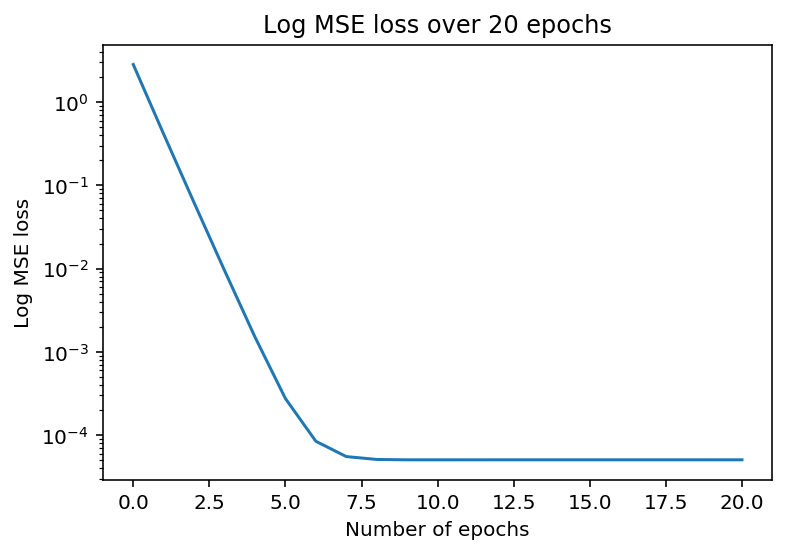

In [149]:
%config InlineBackend.figure_format = 'retina'

plt.plot(range(0, 21), losses)
plt.yscale('log')
plt.title('Log MSE loss over 20 epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Log MSE loss')
plt.show()

**(c)** 

Scatter plot the points ($x_{1k}$, $x_{2k}$, $d_{k}$) for all 100 data-target pairs in a 3D figure (https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html), and plot the lines corresponding to the linear models you got in (a) and (b) respectively in the same figure. Observe if the linear models fit the data well.

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X1, X2 = X[:,1], X[:,2]

# grid
x = np.linspace(X1.min()-1, X1.max()+1, 100)
y = np.linspace(X2.min()-1, X2.max()+1, 100)
xx, yy = np.meshgrid(x, y)

# Create another dimension for our Z
grid = np.concatenate((np.ones(xx.reshape(-1,1).shape), xx.reshape(-1,1), yy.reshape(-1,1)), axis=1)

# Z coordinates
Z1 = (grid @ Wa).reshape(100,100)
Z2 = (grid @ Wb).reshape(100,100)

# Plot
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')
ax.set_title("3D Plot of Linear Models")

ax.contour3D(xx, yy, Z1, 50, cmap = 'Greys')
ax.contour3D(xx, yy, Z2, 50, cmap = 'Oranges')
ax.scatter3D(X1, X2, D, c = 'blue')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

NameError: name 'X' is not defined

**(d)**

Learning rate r is an important hyperparameter for the LMS algorithm, as well as for CNN optimization. Here, try repeat the process in (b) with r set to 0.005, 0.05 and 0.5 respectively. Together with the result you got in (b), plot the MSE losses of the 4 sets of experiments in log scale vs. Epochs in one figure. Then try further enlarge the learning rate to r = 1 and observe how the MSE changes. Base on these observations, comment on how learning rate affects the speed and quality of the learning process. (Note: The learning rate tuning for the CNN optimization will be introduced in Lecture 7.)

>If we look at the plots of MSE loss for each over the learning rate over epochs, we can see that increasing the learning rate leads to finding the optimal parameters faster as the MSE loss drops in less epochs. This is only true up to a certain point as once a learning rate of 0.5 is used, causes the model to converge to a suboptimal solution. In the n-dimensional space where the gradient descent algorithm is working to find a local minimum, having a large learning rate causes gradient descent to bounce off valley walls where the optimal solution may lie. When we use a learning rate of 1, the weights explode and gradient descent will cause the loss to increase. 

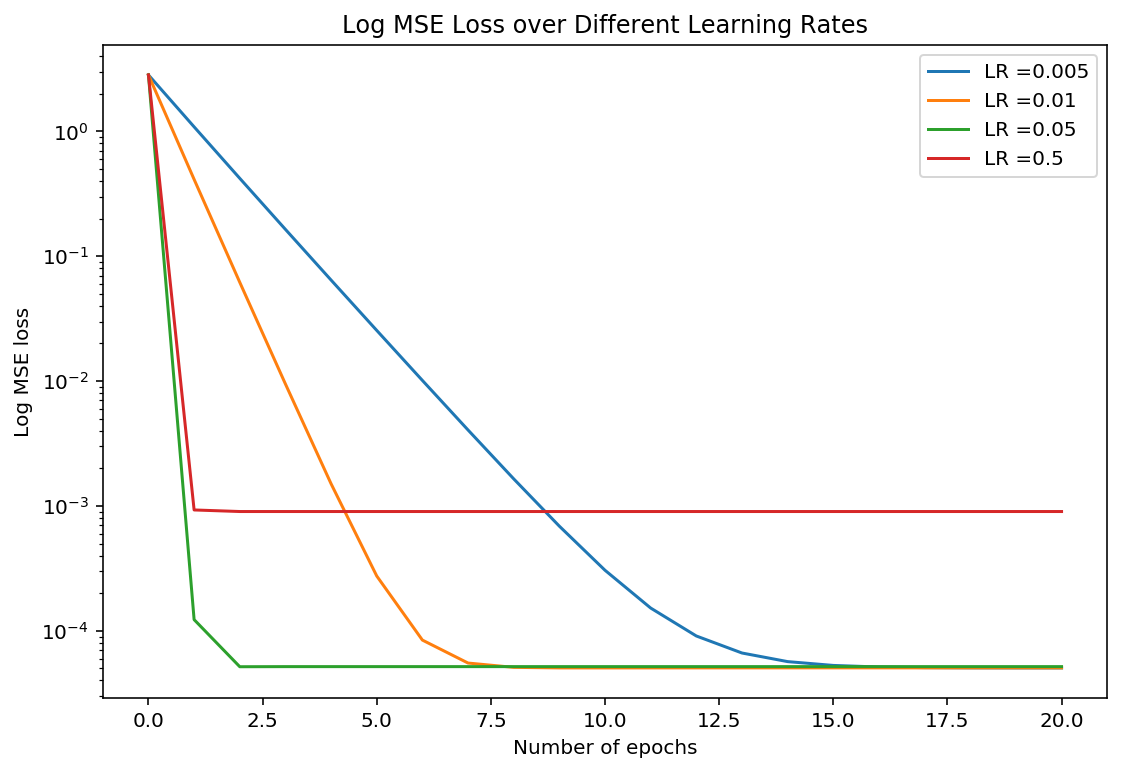

In [123]:
plt.figure(figsize=(9,6))
rs = [0.005, 0.01, 0.05, 0.5]
weight_list = []

for r in rs:
    Wq, losses = LMS(r)
    weight_list.append(Wq)
    plt.plot(range(0,21), losses, label = f'LR ={r}')
    
plt.yscale('log')
plt.title('Log MSE Loss over Different Learning Rates')
plt.xlabel('Number of epochs')
plt.ylabel('Log MSE loss')
plt.legend()
plt.show()

In [139]:
for i in range(4):
    print(f'Weights for learning rate of {rs[i]} \n{weight_list[i]}\n')

Weights for learning rate of 0.005 
[[-0.99922727]
 [ 1.00059363]
 [-2.00040422]]

Weights for learning rate of 0.01 
[[-0.99925145]
 [ 1.00082859]
 [-2.00068123]]

Weights for learning rate of 0.05 
[[-0.99946913]
 [ 1.00163155]
 [-2.00162854]]

Weights for learning rate of 0.5 
[[-1.02030504]
 [ 0.98520802]
 [-1.9666911 ]]



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()


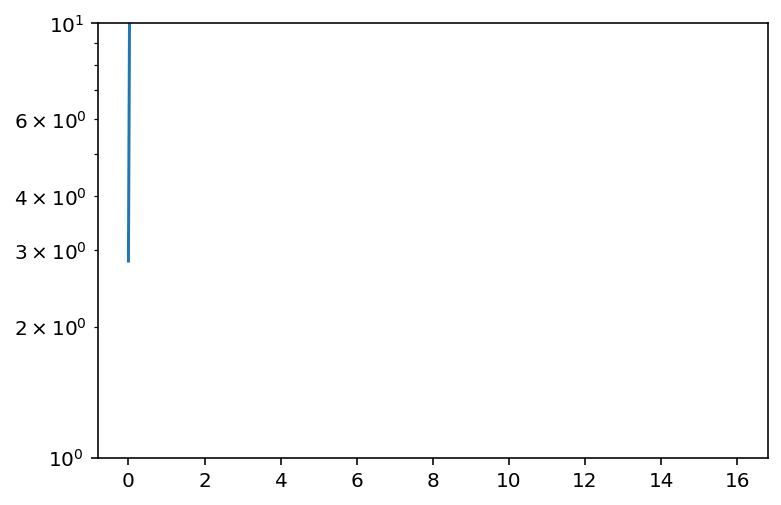

In [170]:
Wq, losses = LMS(1)
plt.plot(range(0,21), losses)
plt.yscale('log')

In [173]:
print(f'MSE for LR of 1:')
losses

MSE for LR of 1:


[2.8311433336832783,
 8.190171003880238e+19,
 5.315159923331934e+38,
 3.4493685919950074e+57,
 2.2385297629920696e+76,
 1.452734135583647e+95,
 9.427779355808586e+113,
 6.118326912315607e+132,
 3.9705982494066945e+151,
 2.576791120209086e+170,
 1.6722549248543786e+189,
 1.085239898479929e+208,
 7.042859433380322e+226,
 4.570590250858831e+245,
 2.9661667166370503e+264,
 1.9249472186294156e+283,
 1.2492291056081223e+302,
 inf,
 inf,
 inf,
 inf]

## Lab 3 Bonus
**(c)** 

Comparing with the histograms you got in (b), are there any differences? Briefly analyze the cause of the difference, and comment on how will initializing CNN model with zero weights will affect the training process.

When the weights were set to zero, the histograms show that the gradient for all layers except the last are 0. This is because when a model is initialized with all weights at zero, this effectivly kills the neurons. In this situation all the neurons are following the same gradient and therefore will all be updated by the same amount making training useless.